<a href="https://colab.research.google.com/github/Deekshitmanisai/Deekshit-s-DataBase/blob/main/Decision_tree_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:



import numpy as np
import pandas as pd
df=pd.read_csv('/content/Enjoy sports.csv')

In [3]:


df.shape

(14, 6)

In [4]:

df.head(10)

,Day,Outlook,Temp.,Humidity,Wind,Decision
0,1,Sunny,Hot,High,Weak,No
1,2,Sunny,Hot,High,Strong,No
2,3,Overcast,Hot,High,Weak,Yes
3,4,Rain,Mild,High,Weak,Yes
4,5,Rain,Cool,Normal,Weak,Yes
5,6,Rain,Cool,Normal,Strong,No
6,7,Overcast,Cool,Normal,Strong,Yes
7,8,Sunny,Mild,High,Weak,No
8,9,Sunny,Cool,Normal,Weak,Yes
9,10,Rain,Mild,Normal,Weak,Yes


In [5]:


def entropy(data):
  d=data.iloc[:,-1]
  d=d.value_counts()
  s=0
  for v in d.keys():
    p=d[v]/sum(d)
    s-=p*np.log2(p)

  return (s)

In [6]:

df.keys()

Index(['Day', 'Outlook', 'Temp.', 'Humidity', 'Wind', 'Decision'], dtype='object')

In [13]:
def informationgain(data,A):
  Es=entropy(data)
  val=values(data[A])
  s_c=data[A].value_counts()
  s_v=[]
  for v in range(len(val)):
    ds=data[data[A]==val[v]]
    s=0
    for res in values(data.iloc[:,-1]):
      try:
        pi=ds.iloc[:,-1].value_counts()[res]/len(ds)
        s-=pi*np.log2(pi)
      except:
        s=0
    s_v.append(s)
  for i in range(len(val)):
    Es=Es-s_c[val[i]]*s_v[i]/sum(s_c)

  return Es



In [14]:


from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [15]:

le=LabelEncoder()
df['Outlook']=le.fit_transform(df['Outlook'])
df['Temperature']=le.fit_transform(df['Temp.'])
df['Humidity']=le.fit_transform(df['Humidity'])
df['Wind']=le.fit_transform(df['Wind'])

In [16]:

x=df[['Outlook','Temperature','Humidity','Wind']]
y=df['Decision']


In [17]:
tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
tree.fit(x,y)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [18]:

DecisionTreeClassifier(criterion='entropy', random_state=0)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [19]:


from sklearn.tree import export_graphviz
import graphviz

In [20]:

dot_data=export_graphviz(tree,out_file=None)
graph=graphviz.Source(dot_data)

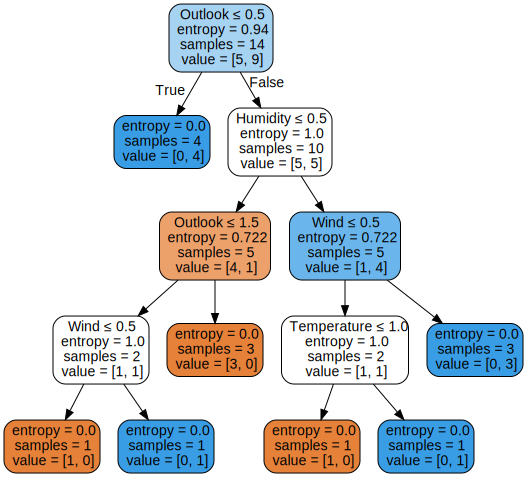

In [21]:
dot_data=export_graphviz(tree,out_file=None,feature_names=x.columns,filled=True,rounded=True,special_characters=True)
graph=graphviz.Source(dot_data)
graph